# Proyecto 1
Elaborado por Ximena Toledo

## Entrenamiento y prueba de un modelo de clasificación 

In [23]:
# Features si = 1 y no = 0
# Tiene el pelo largo?
# Tiene las uñas afiladas?
# Hace 'miau'?
perro1 = [0,1,1]
perro2 = [1,0,1]
perro3 = [1,1,1]
gato1 = [0,1,0]
gato2 = [0,1,1]
gato3 = [1,1,0]

x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

In [4]:
from sklearn.svm import LinearSVC

In [24]:
model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [6]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [27]:
animal_misterioso1 = [1,1,1]
animal_misterioso2 = [1,1,0]
animal_misterioso3 = [0,1,1]
x_test = [animal_misterioso1, animal_misterioso2, animal_misterioso3]
y_test = [0,1,1]

In [28]:
previsiones = model.predict(x_test)

In [29]:
correctos = (previsiones == y_test).sum()
total = len(x_test)
tasa_de_acierto = correctos/total
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 33.33%


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 33.33%


## Estandarización de nombres

# Proyecto 2
## Lectura y manipulación de datos

In [32]:
import pandas as pd

In [33]:
dataset = pd.read_csv('tracking.csv')
dataset.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [34]:
mapa = {
    'home' : 'principal',
    'how_it_works' : 'funcionamiento',
    'contact': 'contacto',
    'bought': 'comprado'
}

In [36]:
dataset = dataset.rename(columns=mapa)
dataset.head()

,principal,funcionamiento,contacto,comprado
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [38]:
x = dataset[['principal', 'funcionamiento', 'contacto', 'comprado']]
x.head()

,principal,funcionamiento,contacto,comprado
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [40]:
y = dataset.comprado

In [41]:
dataset.shape

(99, 4)

In [46]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [70]:
y_train.value_counts()

0    51
1    23
Name: comprado, dtype: int64

In [71]:
y_test.value_counts()

0    15
1    10
Name: comprado, dtype: int64

In [72]:
print(f'Entrenar con {len(x_train)} elementos y se prueba con {len(x_test)} elementos')

Entrenar con 74 elementos y se prueba con 25 elementos


In [74]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 100.0%


## Estratificando splits

In [75]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED=42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=SEED,stratify=y )

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 100.0%


In [76]:
y_train.value_counts()

0    49
1    25
Name: comprado, dtype: int64

In [77]:
y_test.value_counts()

0    17
1     8
Name: comprado, dtype: int64

# Proyecto 3
## Probando en dos dimensiones

In [79]:
dataset = pd.read_csv('projects.csv')
dataset.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [87]:
mapa = {
    'unfinished' : 'no_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'precio'
}

In [86]:
dataset = dataset.rename(columns=mapa)
dataset.head()

,no_finalizado,horas_esperadas,precio
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [91]:
cambio = {
    1:0,
    0:1
}

dataset['finalizado'] = dataset.no_finalizado.map(cambio)
dataset.sample(10)

,no_finalizado,horas_esperadas,precio,finalizado
1754,0,100,23069,1
1201,1,66,4029,0
693,1,89,1779,0
963,1,51,680,0
1481,0,64,2619,1
648,1,21,205,0
909,1,91,11543,0
1612,1,46,896,0
1608,0,91,15344,1
194,1,14,134,0


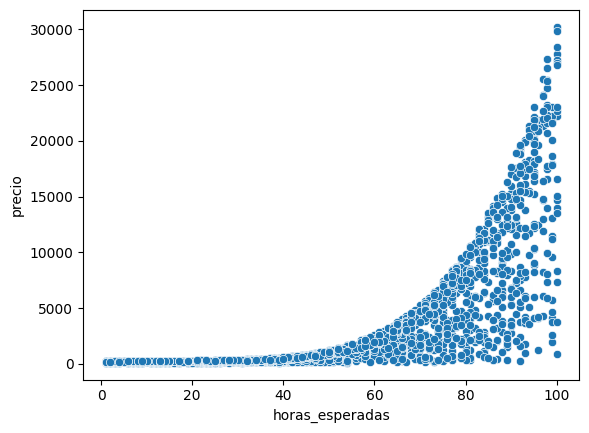

In [93]:
import seaborn as sns
sns.scatterplot(x='horas_esperadas', y='precio', data=dataset);

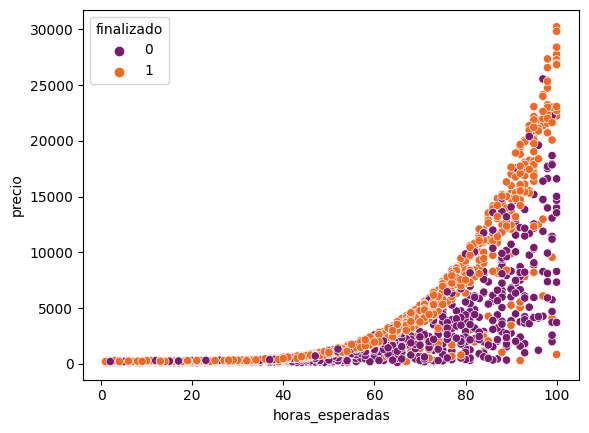

In [96]:
sns.scatterplot(x='horas_esperadas', y='precio', data=dataset ,hue='finalizado', palette='inferno');

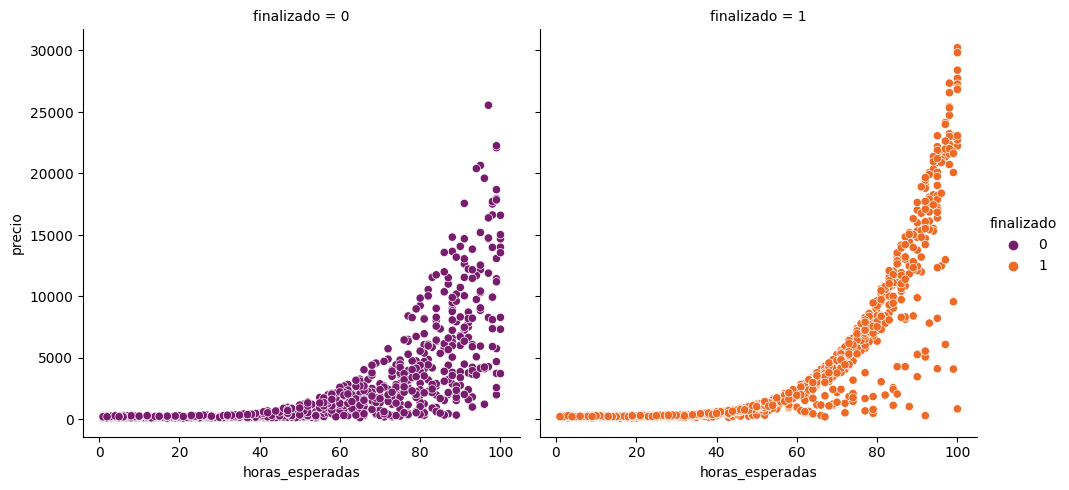

In [97]:
sns.relplot(x='horas_esperadas', y='precio', data=dataset ,hue='finalizado', palette='inferno', col='finalizado');

In [98]:
import numpy as np

x = dataset[['horas_esperadas', 'precio']]
y = dataset.finalizado

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenar con {len(x_train)} elementos y se prueba con {len(x_test)} elementos')

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenar con 1617 elementos y se prueba con 540 elementos
La tasa de acierto fue de: 57.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [99]:
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

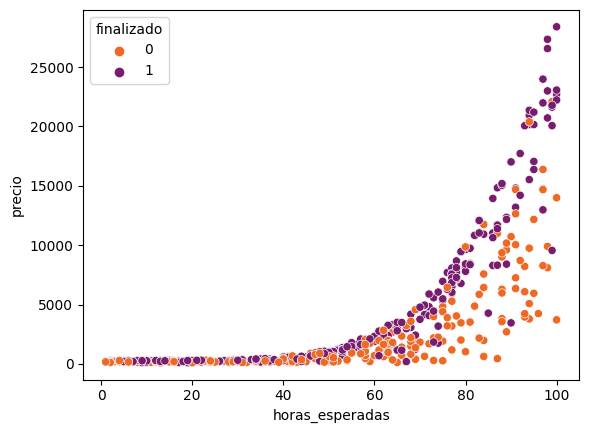

In [103]:
sns.scatterplot(x='horas_esperadas', y='precio', data=x_test,hue=y_test, palette='inferno_r')

In [105]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [106]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [107]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [108]:
z = model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [109]:
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

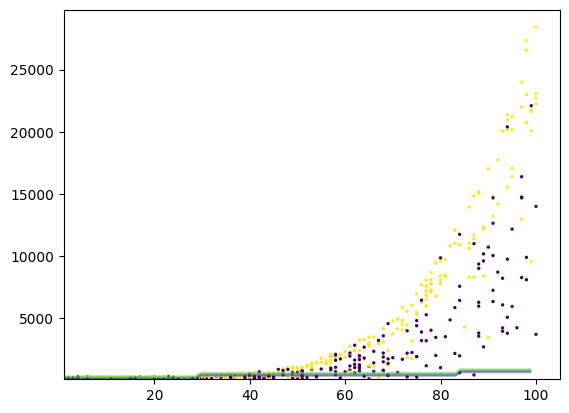

In [111]:
import matplotlib.pyplot as plt

plt.contour(xx, yy, z,alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=2)

## Estimadores no lineales

Entrenar con 1617 elementos y se prueba con 540 elementos
La tasa de acierto fue de: 67.78%


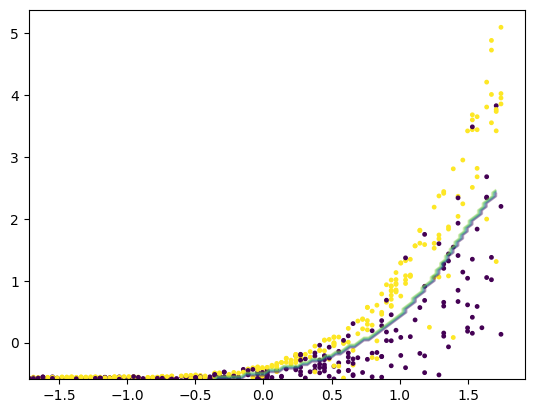

In [117]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = dataset[['horas_esperadas', 'precio']]
y = dataset.finalizado

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenar con {len(x_train)} elementos y se prueba con {len(x_test)} elementos')

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(puntos)

z = z.reshape(xx.shape)

plt.contour(xx, yy, z,alpha=0.3)
plt.scatter(data_x , data_y , c=y_test, s=6)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')